In [5]:
!pip install sparse_lmm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA dataset/TCGA_Ovarian_Cancer_(OV)/TCGA.OV.sampleMap_OV_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA dataset/TCGA_Ovarian_Cancer_(OV)/TCGA.OV.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [7]:
clinical_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_OV,_PANCAN_mutation_PANCAN,_PATIENT,...,_GENOMIC_ID_TCGA_OV_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_OV_exp_HiSeq_exon,_GENOMIC_ID_TCGA_OV_exp_HiSeqV2,_GENOMIC_ID_TCGA_OV_mutation_broad_gene,_GENOMIC_ID_TCGA_OV_PDMarrayCNV,_GENOMIC_ID_TCGA_OV_PDMRNAseqCNV,_GENOMIC_ID_TCGA_OV_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_OV_mutation,_GENOMIC_ID_TCGA_OV_G4502A_07_3,_GENOMIC_ID_TCGA_OV_G4502A_07_2
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-01-0628-11,TCGA-01-0628-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0628-11A-01R-0363-07,NaN
TCGA-01-0629-11,TCGA-01-0629-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0629-11A-01R-0363-07,NaN
TCGA-01-0630-11,TCGA-01-0630-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0630-11A-01R-0363-07
TCGA-01-0631-11,TCGA-01-0631-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0631-11A-01R-0363-07
TCGA-01-0633-11,TCGA-01-0633-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0633-11A-01R-0363-07


In [8]:
gene_data.head()

,TCGA-61-1910-01,TCGA-61-1728-01,TCGA-09-1666-01,TCGA-24-1469-01,TCGA-04-1348-01,TCGA-61-1917-01,TCGA-61-2009-01,TCGA-31-1950-01,TCGA-31-1951-01,TCGA-61-1995-01,...,TCGA-24-1560-01,TCGA-29-1783-01,TCGA-59-2348-01,TCGA-24-1424-01,TCGA-13-1507-01,TCGA-25-2404-01,TCGA-61-2095-01,TCGA-29-1702-01,TCGA-24-1417-01,TCGA-57-1585-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.262892,-0.543692,-1.668892,-1.281392,-1.144492,-1.773892,-1.218792,0.021308,0.249208,-1.112592,...,-3.735192,-0.230492,0.059708,-0.925092,-1.171692,-0.650692,0.385408,-1.699992,-1.256792,0.229008
HIF3A,-2.276126,1.810774,0.123074,4.097674,4.363674,5.661374,4.051874,3.148974,3.307474,0.231174,...,2.480974,5.403474,-2.767226,4.466974,-0.019226,1.622274,4.484274,5.387374,3.476574,3.444374
RNF17,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.068935,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.290565,-0.531035,-0.531035,-0.531035
RNF10,0.657528,0.071628,-0.753772,-0.333972,0.358628,-0.616472,0.125528,0.343428,0.340628,0.379628,...,1.114828,-0.096872,0.765328,0.483628,-1.121872,0.275528,0.115528,-0.670972,0.012128,-0.139572
RNF11,-0.865078,-0.181678,0.343322,-0.507178,-0.729078,-0.145578,0.192422,-0.333178,-0.202478,0.047822,...,0.893722,0.551922,0.161622,-0.313878,0.401022,-0.180578,-0.228178,0.308122,0.070622,-0.144078


In [9]:
gene_fullname = 'BRCA gene'
gene = 'brca'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Ovarian Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 101 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-61-1910-01,-0.262892,-2.276126,-0.531035,0.657528,-0.865078,-1.81391,0.379606,0.150754,-0.423399,-3.023772,...,-0.748878,-1.587117,-2.510633,2.58051,-0.527277,-0.508586,-0.731027,1.415705,-3.972533,0.280488
TCGA-61-1728-01,-0.543692,1.810774,-0.531035,0.071628,-0.181678,-1.09901,0.578406,1.095354,0.649601,-1.266972,...,-0.397378,-1.587117,-0.789233,2.55101,0.644523,-1.043586,-2.238727,1.213805,-1.461233,-0.685312
TCGA-09-1666-01,-1.668892,0.123074,-0.531035,-0.753772,0.343322,-0.54061,1.126406,0.628754,-0.423399,-1.924072,...,-0.748878,-1.587117,-0.535433,1.28071,1.105023,-0.235086,-2.067827,1.491605,-2.963433,-0.783512
TCGA-24-1469-01,-1.281392,4.097674,-0.531035,-0.333972,-0.507178,-1.12581,0.429606,2.185354,1.435201,3.132928,...,-0.748878,-1.127517,0.848167,2.14571,1.372723,-0.922586,-0.875027,-0.842195,-3.276933,-0.976412
TCGA-04-1348-01,-1.144492,4.363674,-0.531035,0.358628,-0.729078,0.64369,0.042406,1.447654,1.103801,-0.437772,...,-0.127978,-0.966217,0.660767,1.89921,0.277323,-0.963686,-1.161227,1.373005,-1.843933,-0.089112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-25-2404-01,-0.650692,1.622274,-0.531035,0.275528,-0.180578,-0.93931,0.450306,2.102254,0.607901,-0.293072,...,0.877622,-1.587117,-0.446933,-0.25009,0.041423,0.363114,-0.749827,0.601505,-0.435733,-0.377312
TCGA-61-2095-01,0.385408,4.484274,0.290565,0.115528,-0.228178,-0.69371,0.409606,1.497654,0.172701,0.589328,...,0.267722,-1.587117,0.200967,-1.28139,0.357323,0.293714,-1.217727,0.010205,0.495667,-1.487612
TCGA-29-1702-01,-1.699992,5.387374,-0.531035,-0.670972,0.308122,-1.19611,0.403006,-0.047946,-0.423399,-1.889772,...,1.930422,-1.587117,-1.437733,-0.98839,0.481423,-0.353486,-2.599027,-1.041095,-3.551733,-0.128112
TCGA-24-1417-01,-1.256792,3.476574,-0.531035,0.012128,0.070622,-0.53051,-0.622794,1.051854,0.320501,-0.746372,...,1.000222,-1.587117,0.934567,-1.28139,-0.191477,0.235914,-0.321627,1.033305,0.349467,-1.142212


In [10]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)

merged_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_OV,_PANCAN_mutation_PANCAN,_PATIENT,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-01-0628-11,TCGA-01-0628-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-01-0629-11,TCGA-01-0629-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-01-0630-11,TCGA-01-0630-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-01-0631-11,TCGA-01-0631-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-01-0633-11,TCGA-01-0633-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-04-1331-01,-28848.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-04-1332-01,-25786.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-04-1335-01,-21963.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-04-1336-01,-20271.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-04-1337-01,-28626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Ovarian Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-04-1331-01,-28848.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
TCGA-04-1332-01,-25786.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
TCGA-04-1335-01,-21963.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
TCGA-04-1336-01,-20271.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
TCGA-04-1337-01,-28626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [13]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

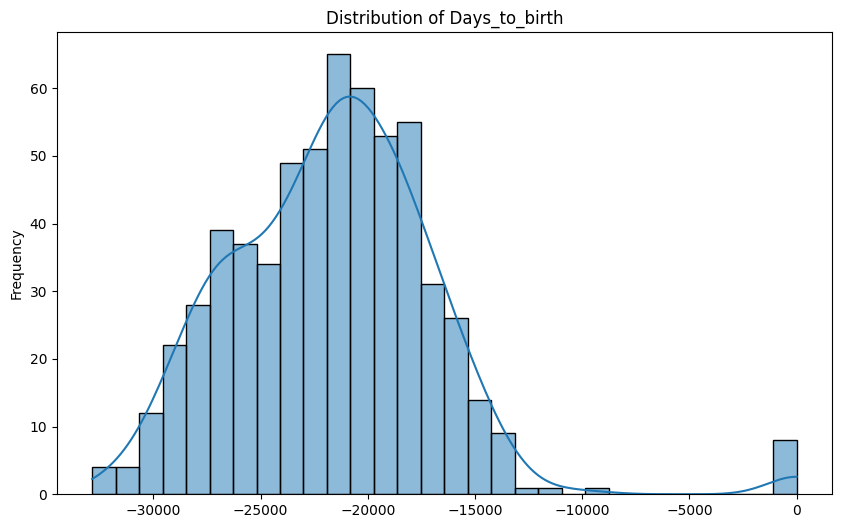

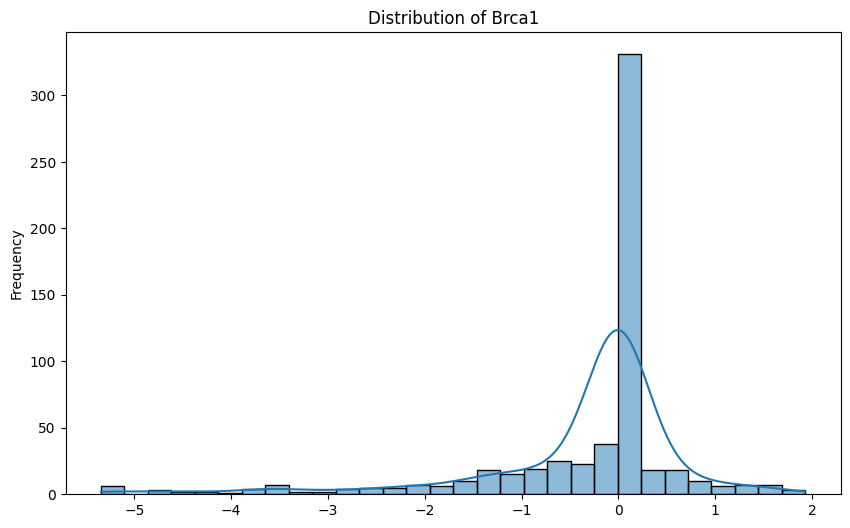

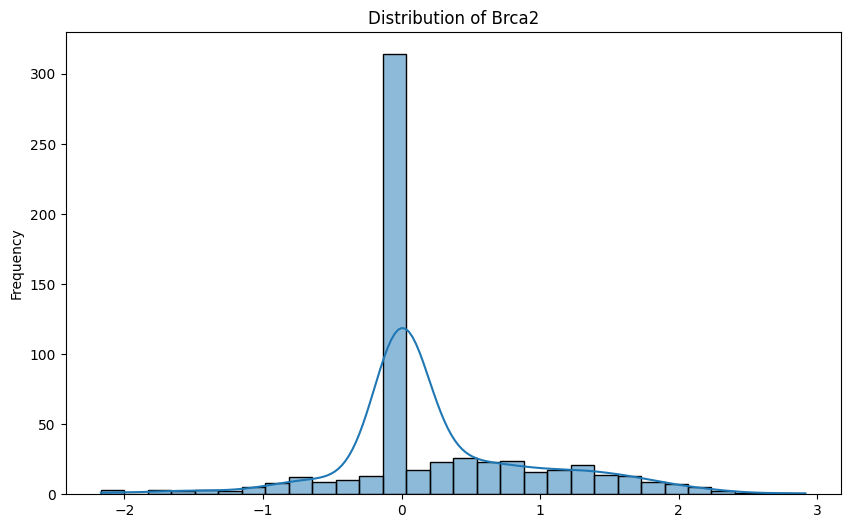

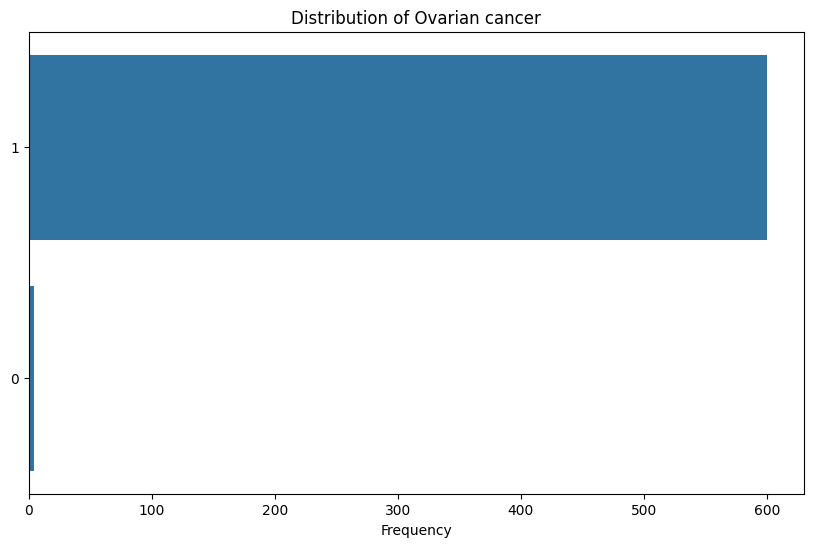

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

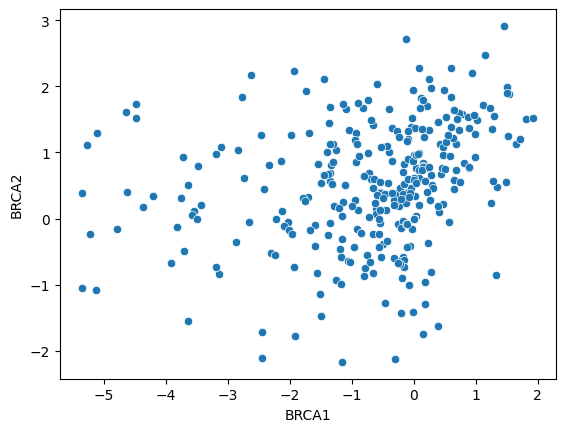

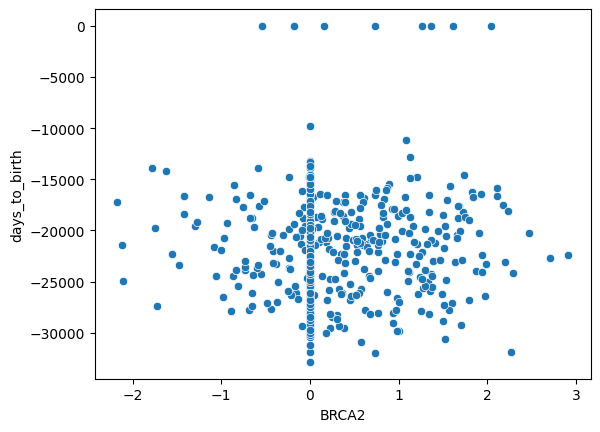

In [15]:
sns.scatterplot(data=merged_data, x='BRCA1', y='BRCA2')
plt.show()
sns.scatterplot(data=merged_data, x='BRCA2', y=condition_col)
plt.show()

In [16]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Ovarian Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-04-1331-01,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
TCGA-04-1332-01,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
TCGA-04-1335-01,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
TCGA-04-1336-01,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
TCGA-04-1337-01,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [17]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

C:\Users\Bobibob\AppData\Local\Temp\ipykernel_5480\2284219672.py:12: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.9868333333333335


In [18]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [19]:
# Print regression result

gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For brca:
BRCA1: Coefficient = -4.4772057547216054e-05, p-value = 0.9983834568321204
BRCA2: Coefficient = 1.98911544542214e-06, p-value = 0.9999382248934299

For age:
age: Coefficient = 0.0016703571111547112, p-value = 0.6564907042816877



In [20]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between BRCA gene and Ovarian Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the BRCA gene and Ovarian Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the BRCA gene and Ovarian Cancer when considering the influence of age.




In [21]:
# Interpretation of Regression Coefficients

threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: BRCA1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: BRCA2
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: age
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).




In [22]:
# Hypothesis Confirmation and Conclusion

# Create a function to determine if H0 or H1 is confirmed
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: BRCA1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA1 gene and Ovarian Cancer when considering the influence of age.

Variable: BRCA2
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA2 gene and Ovarian Cancer when considering the influence of age.


